**Can we predict whether individuals with high cholesterol levels are having heart attack or not, considering their age, sex, and maximum heart rate achieved?**

In [ ]:
#importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree


In [ ]:
#loading data from the local file
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (1).csv


In [ ]:
#creating the data frame called heart_df by reading the csv file and printing the head of the data frame
heart_df = pd.read_csv('heart.csv')
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#to see the number of rows and the number of columns in the data set
heart_df.shape

(303, 14)

**Exploratory Analysis**

In [ ]:
#checking for the non-null values and data type of the variables
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#separating numeric and categorical variables
numeric_vars = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
cat_vars = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

#calculating descriptive statistics for numeric variables
num_stats = heart_df[numeric_vars].describe()
num_stats

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [ ]:
#calculating frequency for categorical variables
cat_freq = heart_df[cat_vars].apply(lambda x: x.value_counts()).T.stack()
cat_freq_df = pd.DataFrame(cat_freq, columns=['frequency'])
cat_freq_df

frequency
sex     0       96.0
        1      207.0
cp      0      143.0
        1       50.0
        2       87.0
        3       23.0
fbs     0      258.0
        1       45.0
restecg 0      147.0
        1      152.0
        2        4.0
exng    0      204.0
        1       99.0
slp     0       21.0
        1      140.0
        2      142.0
caa     0      175.0
        1       65.0
        2       38.0
        3       20.0
        4        5.0
thall   0        2.0
        1       18.0
        2      166.0
        3      117.0
output  0      138.0
        1      165.0

In [ ]:
#to check the mode of the categorical variables
cat_mode = heart_df[cat_vars].mode()
cat_mode_df = pd.DataFrame(cat_mode.values, columns=cat_vars, index=['mode'])
cat_mode_df

,sex,cp,fbs,restecg,exng,slp,caa,thall,output
mode,1,0,0,1,0,2,0,2,1


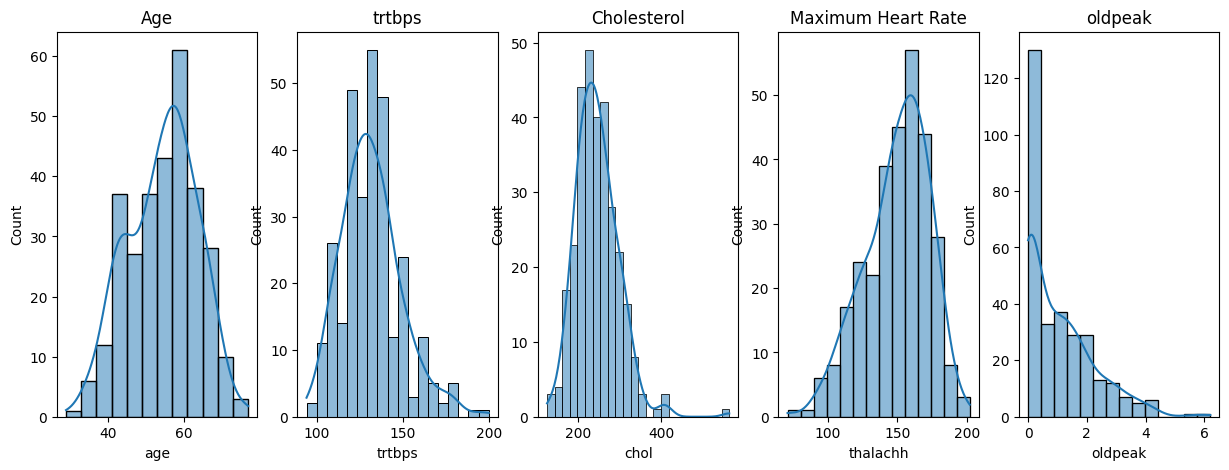

In [ ]:
#creating a figure with 1 row and 5 columns to get the all the histplots in the same output
fig, axs = plt.subplots(1, 5, figsize=(15, 5))

#plotting histograms for age, trtbps, chol, thalach, oldpeak
sns.histplot(x=heart_df['age'], kde=True, ax=axs[0])
sns.histplot(x=heart_df['trtbps'], kde=True, ax=axs[1])
sns.histplot(x=heart_df['chol'], kde=True, ax=axs[2])
sns.histplot(x=heart_df['thalachh'], kde=True, ax=axs[3])
sns.histplot(x=heart_df['oldpeak'], kde=True, ax=axs[4])

#adding titles for each histogram
axs[0].set_title('Age')
axs[1].set_title('trtbps')
axs[2].set_title('Cholesterol')
axs[3].set_title('Maximum Heart Rate')
axs[4].set_title('oldpeak')

#displaying the plot
plt.show()

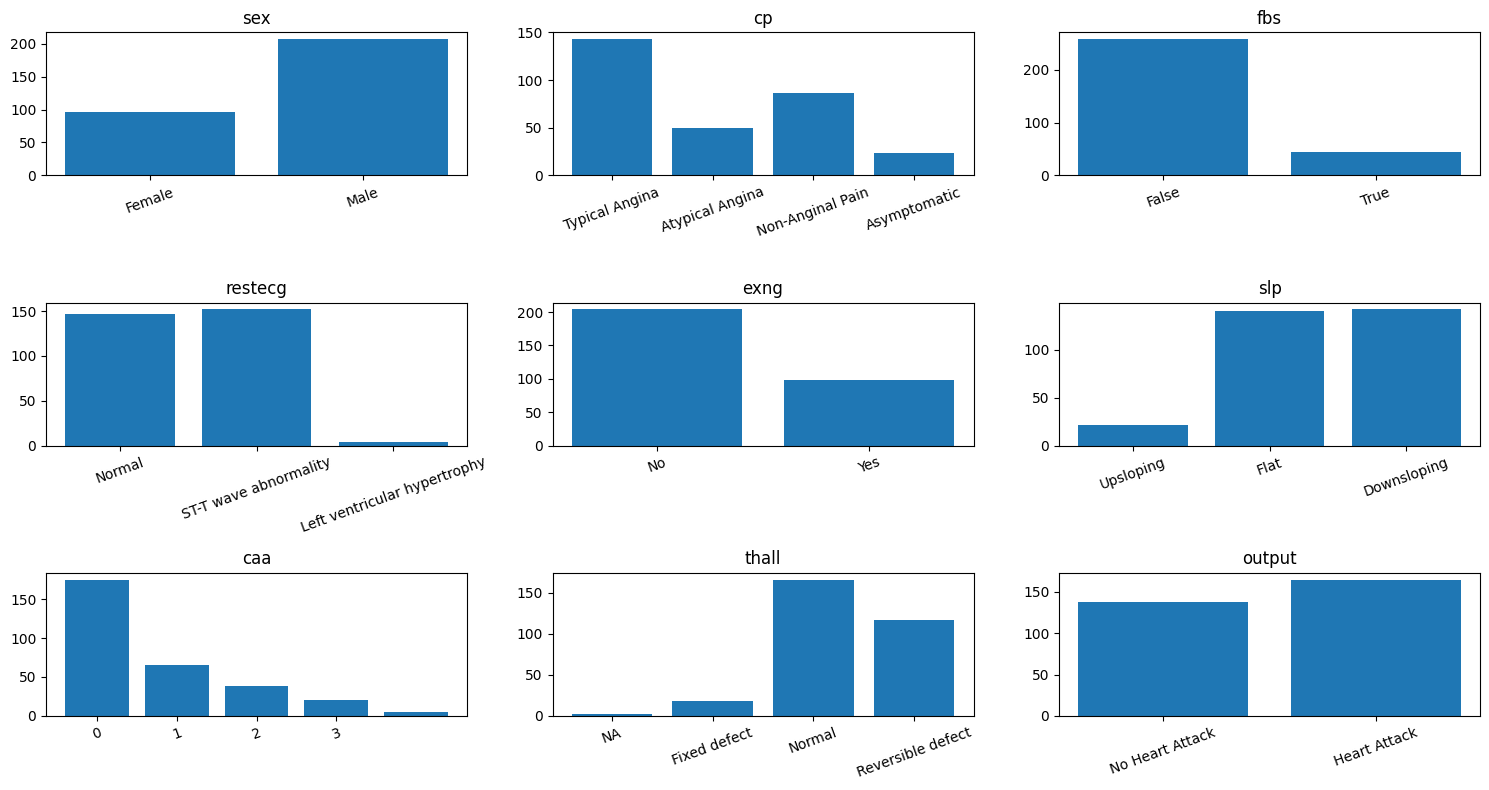

In [ ]:
#defining the categorical variable labels
sex_labels = ['Female', 'Male']
cp_labels = ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic']
fbs_labels = ['False', 'True']
restecg_labels = ['Normal', 'ST-T wave abnormality', 'Left ventricular hypertrophy']
exng_labels = ['No', 'Yes']
slp_labels = ['Upsloping', 'Flat', 'Downsloping']
caa_labels = ['0', '1', '2', '3']
thall_labels = ['NA', 'Fixed defect', 'Normal', 'Reversible defect']
output_labels = ['No Heart Attack', 'Heart Attack']

#creating a list of labels for all categorical variables
labels1 = [sex_labels, cp_labels, fbs_labels, restecg_labels, exng_labels, slp_labels, caa_labels, thall_labels, output_labels]

#creating a figure with subplots to get the all the charts in the same output
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))

#looping through categorical variables and ploting bar charts
for i, var in enumerate(cat_vars):
    row = i // 3  #calculating the row position of the subplot
    col = i % 3   #calculating the column position of the subplot
    counts = heart_df[var].value_counts()
    axs[row, col].bar(counts.index, counts.values)
    axs[row, col].set_xticks(np.arange(len(labels1[i])))
    axs[row, col].set_xticklabels(labels1[i], rotation=20)

    axs[row, col].set_title(var)

plt.tight_layout()
plt.show() #this is to show the cout plot of all categorical variables including output variable 

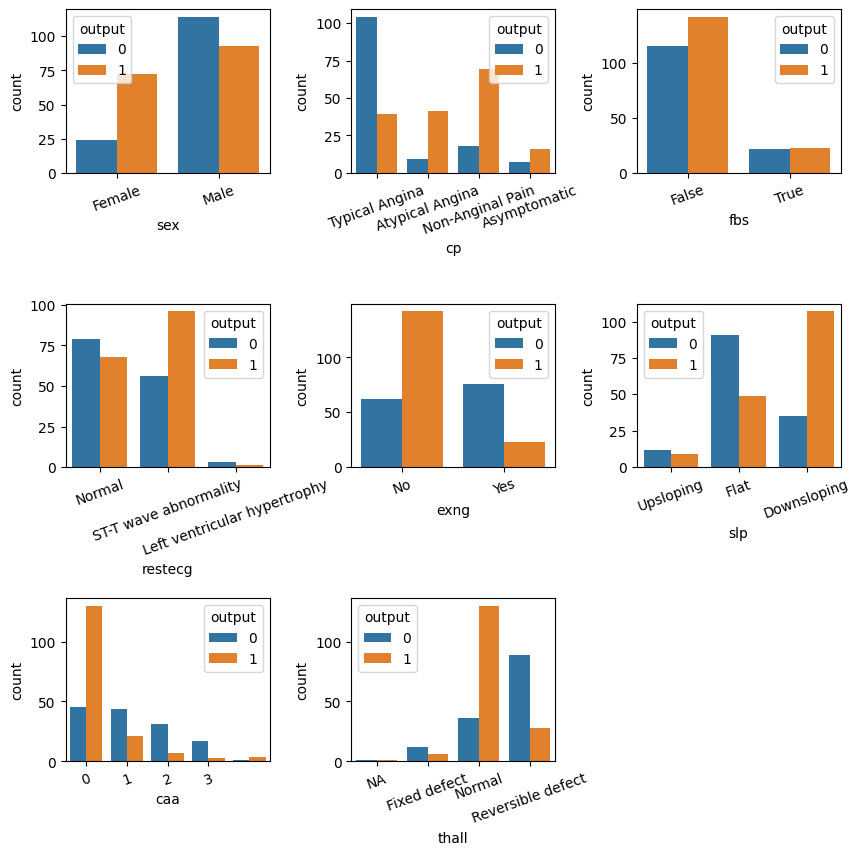

In [ ]:
#defining categorical varibles excluding the output variable to interpret the heart disease presence categorical-wise
cat_vars2 = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

#creating a list of labels for all categorical variables
labels = [sex_labels, cp_labels, fbs_labels, restecg_labels, exng_labels, slp_labels, caa_labels, thall_labels]

#creating the plot
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(hspace=0.8, wspace=0.4, bottom=0.01, top=0.95)

rows = 3
cols = 3

for i, var in enumerate(cat_vars2):
    i = i + 1
    ax = fig.add_subplot(rows, cols, i)
    sns.countplot(data = heart_df, x = var, hue = 'output', ax = ax)
    ax.set_xticks(np.arange(len(labels[i-1])))
    ax.set_xticklabels(labels[i-1], rotation=20)


plt.show()  #this is to show the count of categorical values including the heart attack presence within the variables
#output=0 - less chance of heart attack
#output=1 - more chance of heart attack


Text(0.5, 1.0, 'Correlation Matrix')

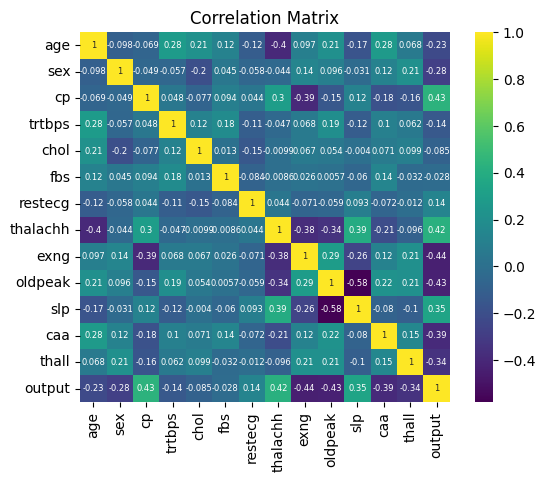

In [ ]:
#plotting correlation metrix

ax = sns.heatmap(heart_df.corr(method='pearson'), annot=True, cmap='viridis', annot_kws={"size": 6}, square=True)
ax.set_title('Correlation Matrix')

**Data Preprocessing**

In [ ]:
#checking for missing values
heart_df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<Axes: >

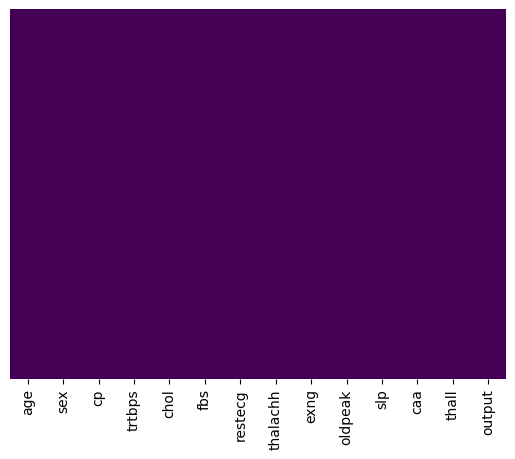

In [ ]:
#interpreting null values using heatmap
sns.heatmap(heart_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#checking for duplicates
duplicated = heart_df.duplicated().sum
if duplicated:
  print('duplicate rows:{}'.format(duplicated))
else:
  print('no duplicates')

duplicate rows:<bound method NDFrame._add_numeric_operations.<locals>.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool>


In [ ]:
#defining variables for our analysis, defining X
X = np.asarray(heart_df[['age', 'sex', 'cp', 'trtbps', 'chol', 'thalachh', 'exng']])
X[0:5]

array([[ 63,   1,   3, 145, 233, 150,   0],
       [ 37,   1,   2, 130, 250, 187,   0],
       [ 41,   0,   1, 130, 204, 172,   0],
       [ 56,   1,   1, 120, 236, 178,   0],
       [ 57,   0,   0, 120, 354, 163,   1]])

In [ ]:
#defining Y
Y = np.asarray(heart_df['output'])
Y[0:5]

array([1, 1, 1, 1, 1])

In [ ]:
#in order to check the zscore value
X=stats.zscore(X)
X[0:5]

array([[ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
         0.01544279, -0.69663055],
       [-1.91531289,  0.68100522,  1.00257707, -0.09273778,  0.07219949,
         1.63347147, -0.69663055],
       [-1.47415758, -1.46841752,  0.03203122, -0.09273778, -0.81677269,
         0.97751389, -0.69663055],
       [ 0.18017482,  0.68100522,  0.03203122, -0.66386682, -0.19835726,
         1.23989692, -0.69663055],
       [ 0.29046364, -1.46841752, -0.93851463, -0.66386682,  2.08204965,
         0.58393935,  1.43548113]])

In [74]:
#splitiing data set into training and test in order to carry out the analysis

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (242, 7) (242,)
Test set: (61, 7) (61,)


**Modelling Logistic Regression**

In [75]:
#training the logistic regression model

LR_heart = LogisticRegression().fit(X_train,Y_train)
LR_heart

LogisticRegression()

In [76]:
#predicting the heart attack depending on the test data
Yhat = LR_heart.predict(X_test)
Yhat[0:5]

array([1, 0, 1, 1, 0])

In [77]:
#predicting probabilities 
Yhat_prob = LR_heart.predict_proba(X_test)
Yhat_prob[0:5]

array([[0.17582215, 0.82417785],
       [0.72096027, 0.27903973],
       [0.31192306, 0.68807694],
       [0.38707852, 0.61292148],
       [0.91117499, 0.08882501]])

In [78]:
#Printing first 5 rows of Y_test to check the similarity
Y_test[0:5]

array([1, 0, 1, 1, 0])

In [79]:
#evaluating performance by calculating accuracy, precision, recall, and f1 values 

accuracy = accuracy_score(Y_test, Yhat)
precision = precision_score(Y_test, Yhat)
recall = recall_score(Y_test, Yhat)
f1 = f1_score(Y_test, Yhat)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.8524590163934426
Precision: 0.8108108108108109
Recall: 0.9375
F1 Score: 0.8695652173913043


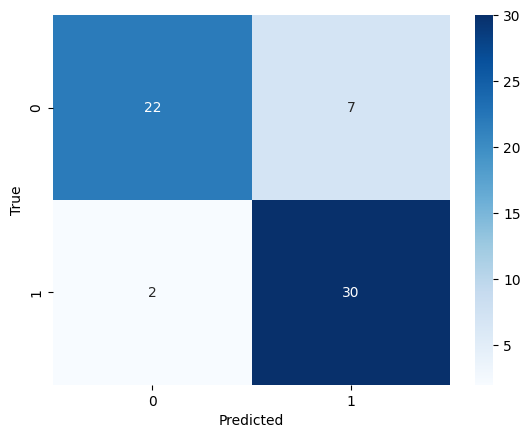

In [80]:
#to plot the confusion matrix

cm = confusion_matrix(Y_test, Yhat)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [81]:
#calculating log odds
log_odds = np.log(Yhat_prob / (1 - Yhat_prob))
log_odds[0:5]

array([[-1.54491336,  1.54491336],
       [ 0.94922983, -0.94922983],
       [-0.79114411,  0.79114411],
       [-0.45960925,  0.45960925],
       [ 2.32806672, -2.32806672]])

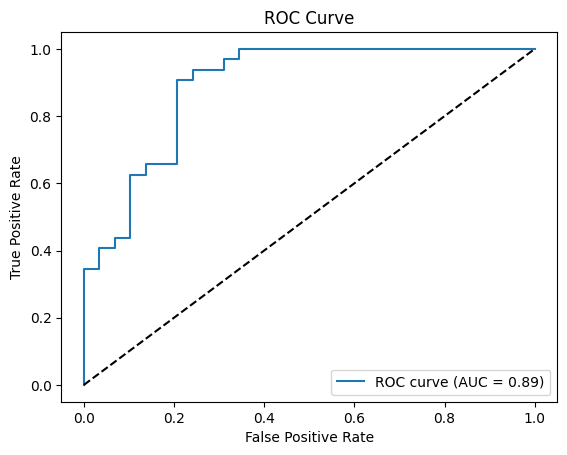

In [82]:
#calculating ROC curve and AUC score
Yhat_prob2 = LR_heart.predict_proba(X_test)[:, 1]  #in order to get the ROC curve, 1 dimensional probability array is necessary
fpr, tpr, thresholds = roc_curve(Y_test, Yhat_prob2)
auc = roc_auc_score(Y_test, Yhat_prob2)

#plotting ROC curve

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

**Support Vector Machine (SVM)**

In [83]:
#Using the default Radial Basis Function to train the model

SVM_heart = svm.SVC(kernel='rbf', probability=True)
SVM_heart.fit(X_train, Y_train) 

SVC(probability=True)

In [84]:
#Predicting the output values of the trained model(RBF)
Y_hat = SVM_heart.predict(X_test)
Y_hat[0:5]

array([1, 0, 1, 1, 0])

In [85]:
Y_hat_prob = SVM_heart.predict_proba(X_test)
Y_hat_prob[0:5]

array([[0.38725036, 0.61274964],
       [0.73735224, 0.26264776],
       [0.41328316, 0.58671684],
       [0.2333359 , 0.7666641 ],
       [0.76338036, 0.23661964]])

In [86]:
#printing Y_test
Y_test[0:5]

array([1, 0, 1, 1, 0])

In [87]:
#evaluating performance by to calculating accuracy, precision, recall, and f1 values
accuracy = accuracy_score(Y_test, Y_hat)
precision = precision_score(Y_test, Y_hat)
recall = recall_score(Y_test, Y_hat)
f1 = f1_score(Y_test, Y_hat)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.8360655737704918
Precision: 0.8055555555555556
Recall: 0.90625
F1 Score: 0.8529411764705882


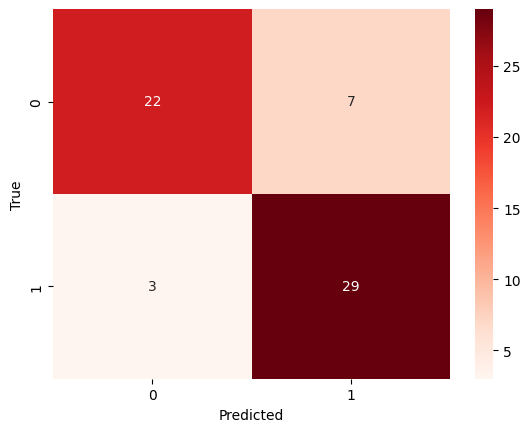

In [88]:
#to plot the confusion matrix
cm = confusion_matrix(Y_test, Y_hat)
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [89]:
#calculating log odds
log_odds = np.log(Y_hat_prob / (1 - Y_hat_prob))
log_odds[0:5]

array([[-0.45888504,  0.45888504],
       [ 1.0322519 , -1.0322519 ],
       [-0.35040934,  0.35040934],
       [-1.18956972,  1.18956972],
       [ 1.17130248, -1.17130248]])

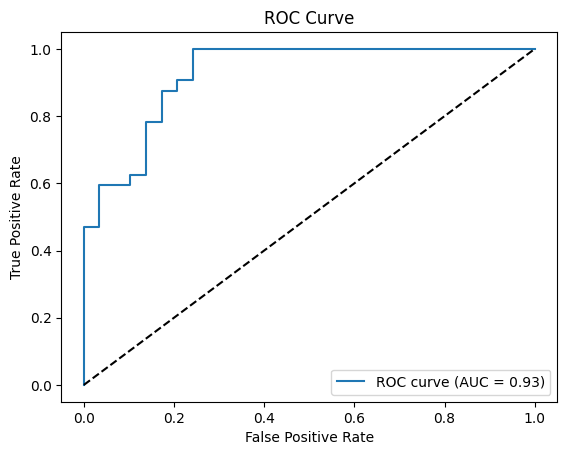

In [90]:
#calculating ROC curve and AUC score
Y_hat_prob2 = SVM_heart.predict_proba(X_test)[:, 1]  #in order to get the ROC curve, 1 dimensional probability array is necessary
fpr, tpr, thresholds = roc_curve(Y_test, Y_hat_prob2)
auc = roc_auc_score(Y_test, Y_hat_prob2)

#plotting ROC curve

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

**Decision Tree**

In [91]:
#creating an instance of decision tree called HeartAttackTree
HeartAttackTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [92]:
#filling the data to the tree with training data sets
HeartAttackTree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [93]:
#creating the prediction tree
PredHATree = HeartAttackTree.predict(X_test)

In [94]:
#evaluating the performance by calculating the accuracy, precision, recall, and F1 score
accuracy = accuracy_score(Y_test, PredHATree)
precision = precision_score(Y_test, PredHATree)
recall = recall_score(Y_test, PredHATree)
f1 = f1_score(Y_test, PredHATree)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.8360655737704918
Precision: 0.7894736842105263
Recall: 0.9375
F1 Score: 0.8571428571428572


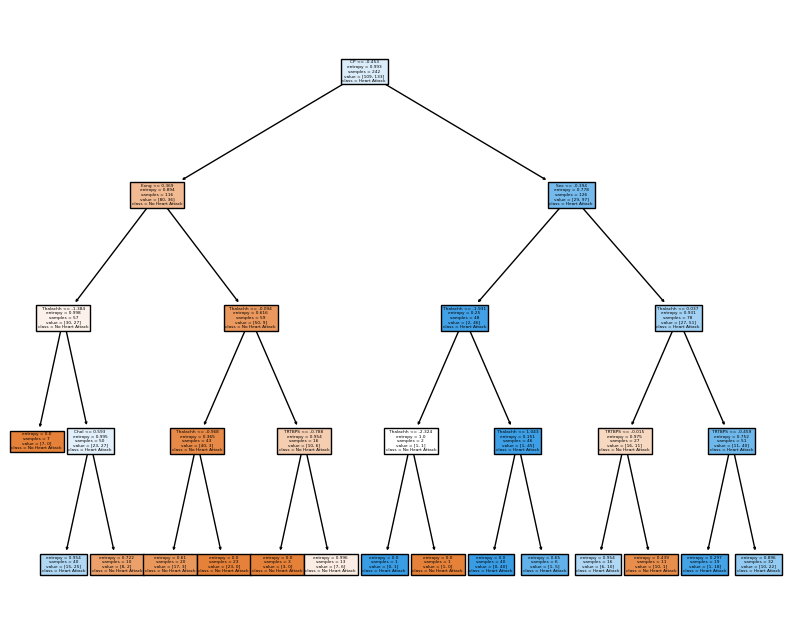

In [95]:
#importing necessary libraries and plotting decision tree
plt.figure(figsize=(10,8))
plot_tree(HeartAttackTree, feature_names=['Age', 'Sex', 'CP', 'Chol', 'TRTBPS', 'Thalachh', 'Exng'], class_names=['No Heart Attack', 'Heart Attack'], filled=True)
plt.show()




**Random Forest Classifier**

In [96]:
#to import necessary libraries


#creating a random forest classifier object
rfc_heart = RandomForestClassifier(n_estimators=100, max_depth=3)

In [97]:
#training the model on the training set
rfc_heart.fit(X_train, Y_train)

RandomForestClassifier(max_depth=3)

In [98]:
#making predictions on the testing set
Y_rfcHA_pred = rfc_heart.predict(X_test)
Y_rfcHA_pred[0:5]

array([1, 0, 1, 1, 0])

In [99]:
Y_rfcHA_pred_prob = rfc_heart.predict_proba(X_test)
Y_rfcHA_pred_prob[0:5]

array([[0.27709334, 0.72290666],
       [0.74203444, 0.25796556],
       [0.45384484, 0.54615516],
       [0.40122127, 0.59877873],
       [0.72938912, 0.27061088]])

In [100]:
#evaluate the performance of the model by calculating accracy, precision, recall, and F1
accuracy = accuracy_score(Y_test, Y_rfcHA_pred)
precision = precision_score(Y_test, Y_rfcHA_pred)
recall = recall_score(Y_test, Y_rfcHA_pred)
f1 = f1_score(Y_test, Y_rfcHA_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.8360655737704918
Precision: 0.8055555555555556
Recall: 0.90625
F1 Score: 0.8529411764705882


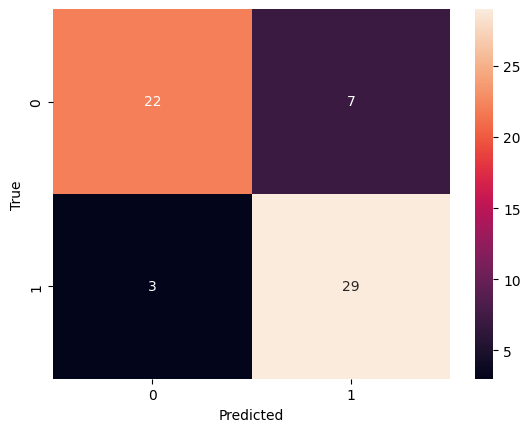

In [101]:
#to plot the confusion matrix
cm = confusion_matrix(Y_test, Y_rfcHA_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

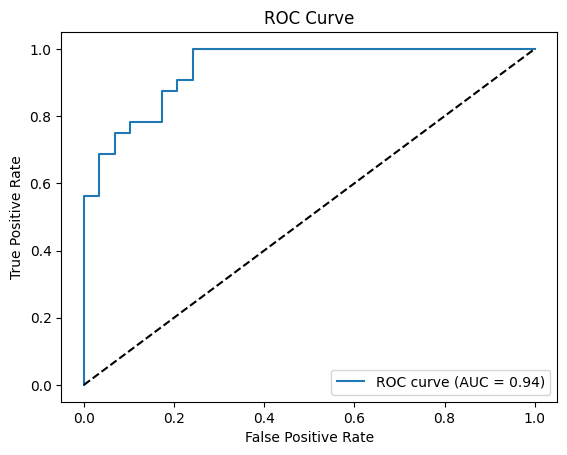

In [102]:
#ploting the ROC curve and calculating the AUC-ROC
Y_rfcHA_pred_prob2 = rfc_heart.predict_proba(X_test)[:, 1]  #in order to get 1 dimensional for the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_rfcHA_pred_prob2)
auc = roc_auc_score(Y_test, Y_rfcHA_pred_prob2)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


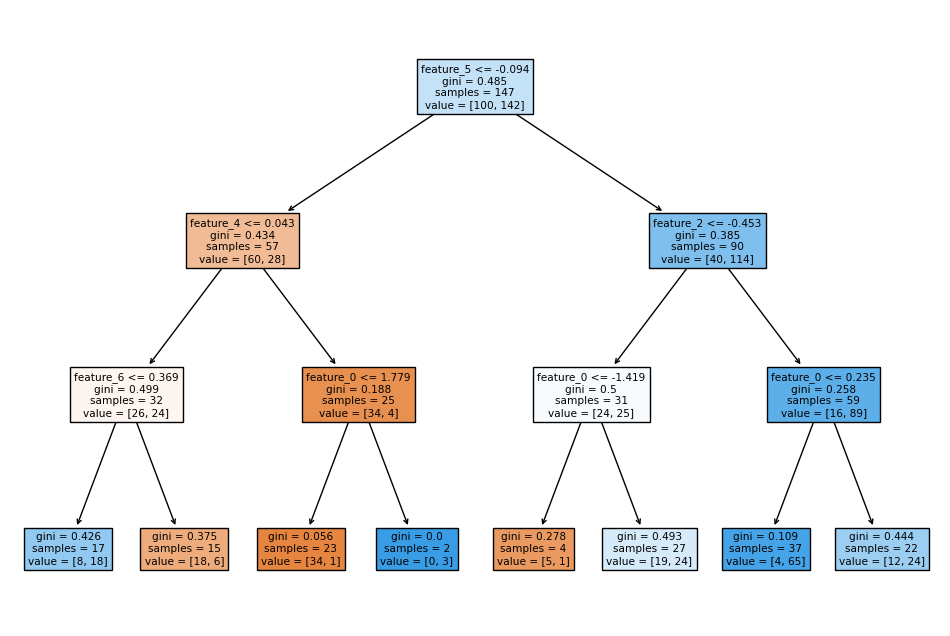

In [103]:
#ploting random forest tree

plt.figure(figsize=(12, 8))
plot_tree(rfc_heart.estimators_[0], filled=True, feature_names=['feature_{}'.format(i) for i in range(X_train.shape[1])])
plt.show()